In [24]:
import sys
from pathlib import Path
sys.path.append(str(Path.cwd().parent))
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scrapper.scrape_games import scrape_games
from scrapper.scrape_games import match_players_to_linestar
from utils.data_loader import load_linestar_data

pd.set_option('display.max_rows', None)


In [28]:
slate_date = "2025-11-01"
pbp_features = scrape_games(slate_date, force_rescrape=False)
linestar_df = load_linestar_data(slate_date, normalize=False)

 
# get team and salary info
aligned = match_players_to_linestar(pbp_features[['Player']], linestar_df['Name'].tolist())
pbp_features = pbp_features.merge(aligned, on='Player', how='left')

#add team and salary info
merge_cols = linestar_df[['Name', 'Team', 'Salary']]
pbp_features = pbp_features.merge(merge_cols, left_on='Player', right_on='Name', how='left')
pbp_features = pbp_features.drop(columns=['Name'])

#Removing players with NaN salary
pbp_features = pbp_features[pbp_features['Salary'].notna()] 

# Removing players who played less than 5 minutes
pbp_features = pbp_features[pbp_features['Minutes'] >= 10]

# dropping momentum colums
pbp_features = pbp_features.drop(columns=['Momentum'])
 
pbp_features.sort_values(by='ClutchFP', ascending=False)




2025-11-08 09:49:03,820 - scrapper.scrape_games - INFO - Loading existing PBP features for 2025-11-01


,Player,FPM,Usage,FP,Minutes,ClutchFP,ClutchRatio,TouchesPerMin,ThreeRate,ScoringFrequency,ScoringConsistency,DominantQuarter,LateGameEmphasis,Substitutions,StarterOrStuffer,Team,Salary
129,Quenton Jackson,1.774194,1.129032,55.00,31.0,14.75,0.268182,0.677419,0.000000,0.387097,0.195657,4,0.416667,2.0,1,IND,3700.0
60,Goga Bitadze,1.550000,0.750000,31.00,20.0,13.75,0.443548,0.400000,1.000000,0.350000,0.151501,4,0.714286,4.0,0,ORL,3800.0
90,Jordan Walsh,0.921053,0.578947,17.50,19.0,12.00,0.685714,0.578947,0.750000,0.210526,0.527895,4,1.000000,2.0,1,BOS,3000.0
111,Mike Conley,0.870690,0.586207,25.25,29.0,8.25,0.326733,0.448276,0.333333,0.172414,0.082077,4,0.600000,4.0,1,MIN,4400.0
32,Clint Capela,1.194444,0.333333,21.50,18.0,7.50,0.348837,0.555556,0.000000,0.166667,0.064893,4,1.000000,2.0,1,HOU,3200.0
64,Isaiah Jackson,1.119048,0.523810,23.50,21.0,7.00,0.297872,0.666667,0.000000,0.380952,0.212020,4,0.750000,2.0,1,IND,4500.0
15,Baylor Scheierman,1.336957,0.782609,30.75,23.0,6.75,0.219512,0.391304,1.000000,0.304348,0.204248,4,0.428571,3.0,1,BOS,3300.0
48,Donte DiVincenzo,1.040323,0.709677,32.25,31.0,6.25,0.193798,0.580645,0.777778,0.225806,0.089919,3,0.285714,3.0,1,MIN,6600.0
138,Ryan Kalkbrenner,0.724138,0.241379,21.00,29.0,5.75,0.273810,0.310345,0.000000,0.137931,0.107764,3,0.500000,3.0,1,CHA,4600.0
93,Julius Randle,1.476562,1.125000,47.25,32.0,5.50,0.116402,0.812500,0.285714,0.468750,0.216660,1,0.266667,4.0,1,MIN,8500.0


<Axes: >

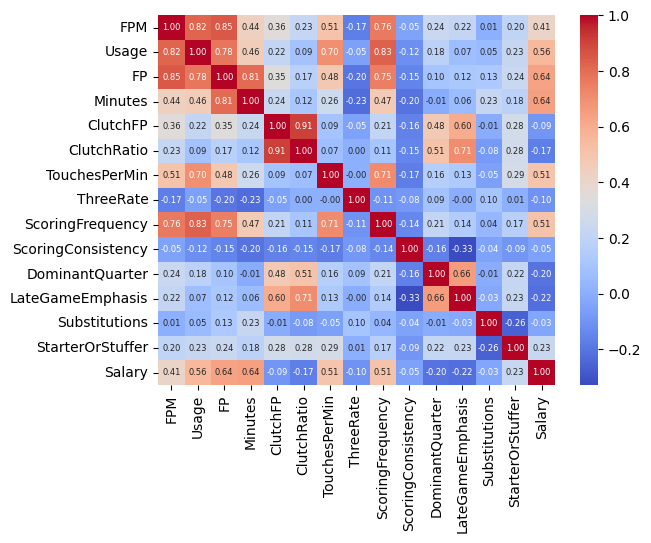

In [29]:
# dropping player names and running a correlation matrix
data = pbp_features.drop(columns=['Player', 'Team'])
#pbp_features.corr()

# normalize each data column from 0 to 1 using each column's own distribution
#data = data.apply(lambda x: (x - x.min()) / (x.max() - x.min()))


# i need to adjust the annot font size and limit the decimal places to 2
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', annot_kws={'size': 6}, fmt='.2f')





/Users/kgedin/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kgedin/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kgedin/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kgedin/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in 

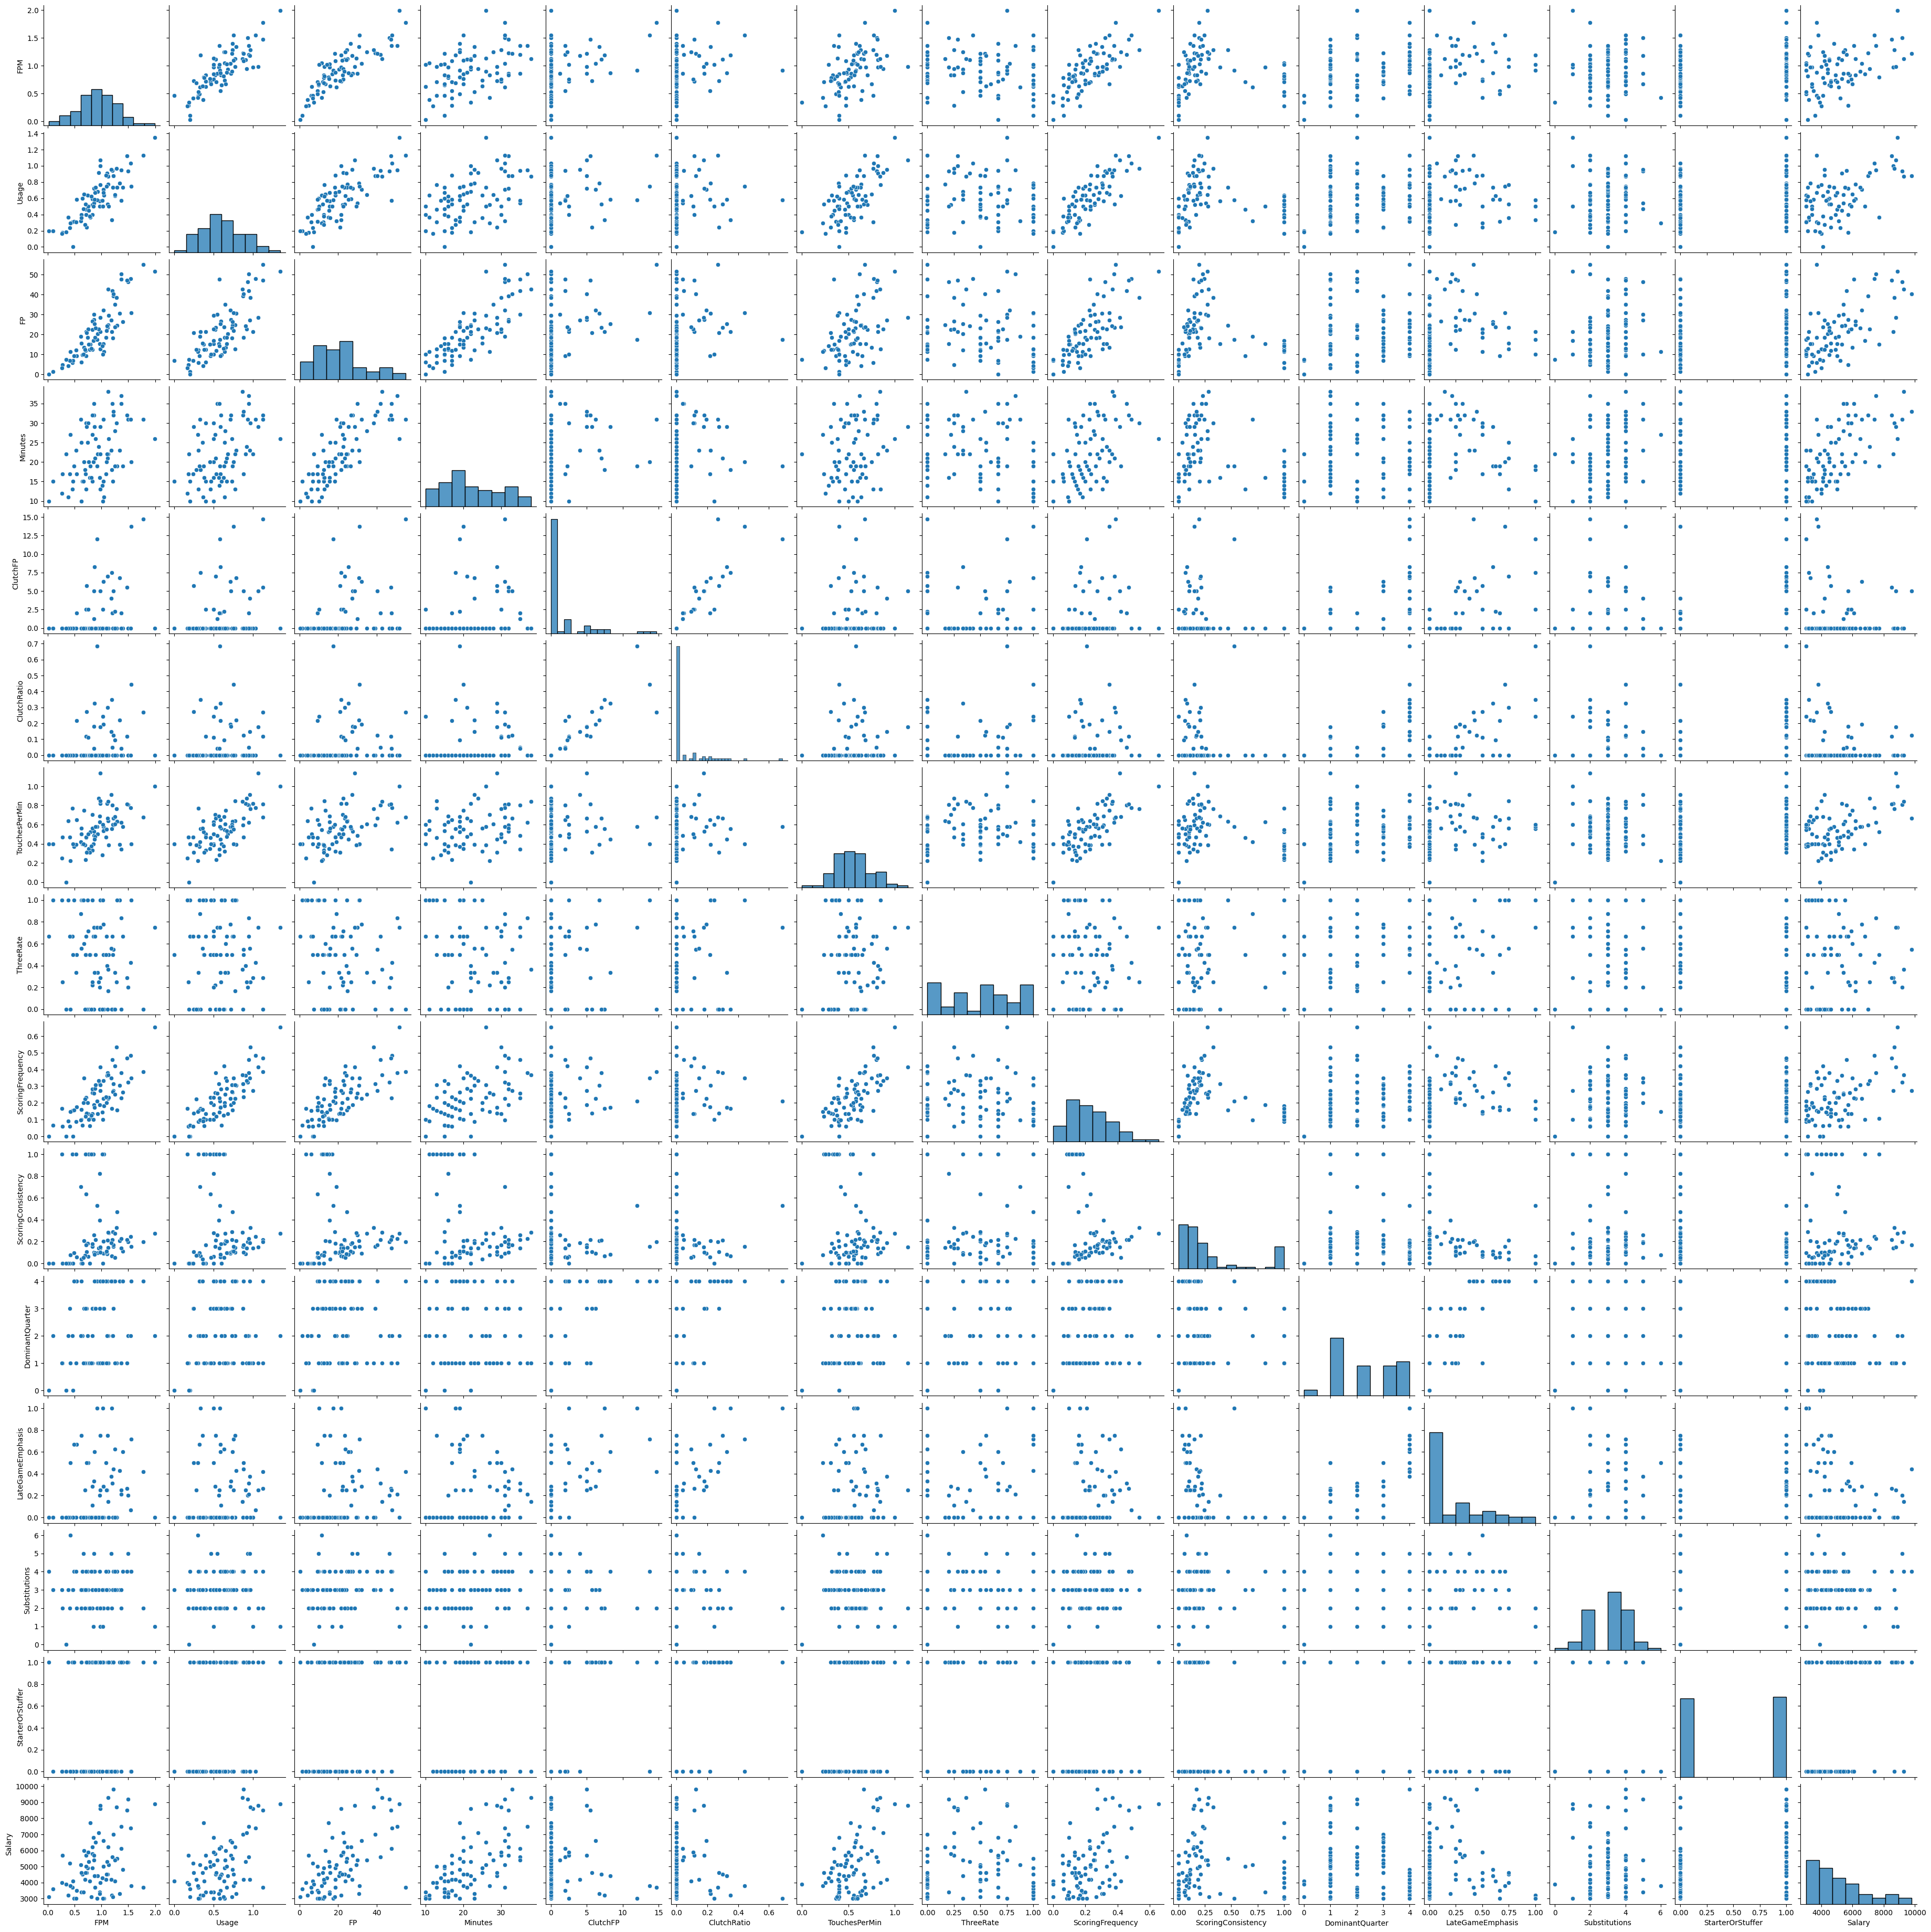

In [31]:
sns.pairplot(data)